Kenneth Reed
SQL - Alchemy HW

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Use inspector to check the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
engine.execute('select * from measurement limit 6').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0)]

In [8]:
#Inspect the table Measurement
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#Inspect the table station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

rain = [Measurement.prcp, Measurement.date]

#rain_lastYear

# Calculate the date 1 year ago from the last data point in the database

maxDate = session.query(func.max(Measurement.date)).all()
maxDate1 = maxDate[0]
maxDate2 = pd.to_datetime(maxDate1)
yearAgo = maxDate2 - pd.DateOffset(years=1)
yearAgo1 = yearAgo[0]
yearAgo2 = pd.to_datetime(yearAgo1).date()

# Perform a query to retrieve the data and precipitation scores
lastYear = session.query(*rain).\
    filter(Measurement.date > yearAgo2).\
    order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date




In [75]:
lastYear

[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

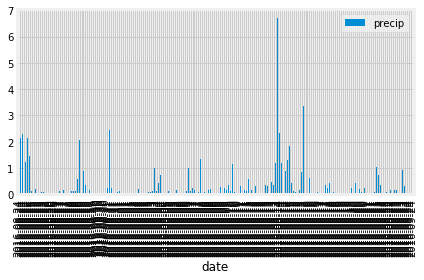

In [76]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(lastYear, columns=['precip', 'date'])

df.set_index('date', inplace=True)
df = df.head(200)
df = df.sort_values('date', ascending=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
